## 14.1 Introduction
**Functions are subprograms, and subprograms are the soul of modern programming languages**

Functions provide the programmer with a way to enlarge the set of elementary building blocks with which to write programs - they enable the programmer to extend the set of operations and constructs natively supported by the language to include new primitives.

Functions are such an important concept that they have been part of languages since the very early days, and support for them is provided directly in all instruction set architectures, including the LC-3.

**Why are they so important?** Functions (or procedures, or subroutines, or methods—all of which are variations of the same theme) enable **abstraction**. 
- they increase our ability to separate the "function" of a component from the details of how it accomplishes that "function."

Once the component is created and we understand its construction, we can use the component as a building block without giving much thought to its detailed implementation

The C programming language is heavily oriented around functions. A C program is essentially a collection of functions.

Every statement belongs to one (and only one) function. All C programs start and finish execution in the function `main`.

The function main might call other functions along the way, and they might, in turn, call more functions. Control eventually returns to the function main, and when main ends, the program ends

## 14.2 Functions in C 
### 14.2.1 A Function with a Parameter 
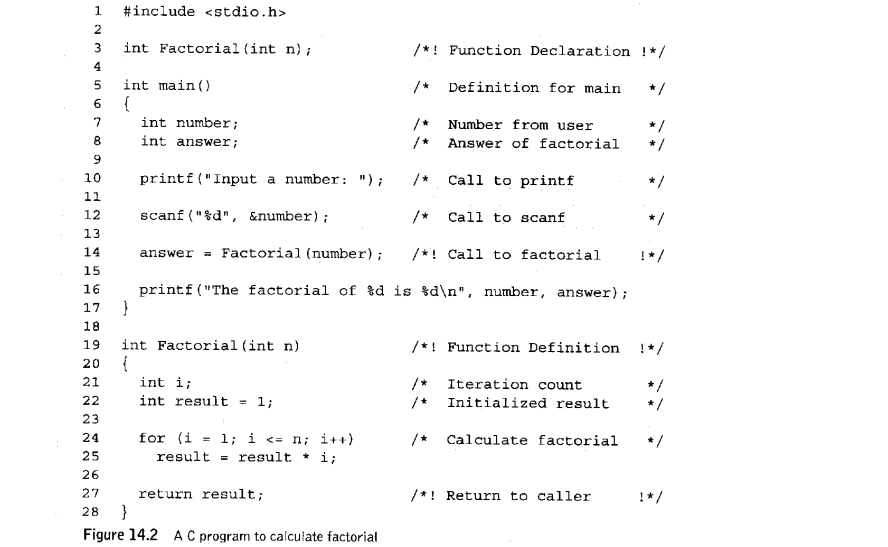

#### The Declaration 
In the preceding example, the function declaration for Factorial appears at line 3.

Sometimes called a function
prototype, a function declaration contains the name of the function, the type of
value it returns, and a list of input values it expects. The function declaration ends
with a semicolon.

If a function does not return a value, then its return type must be declared as void, indicating to the compiler that the function returns nothing.

#### The Call
Line 14 in our example is the function call that invokes Factorial.

#### The Definition
The code beginning at line 19 is the function definition for Factorial

#### The Return Value
In line 27, control passes back from Factorial to the caller main.

In the case of Factorial, the statement return result transmits the calculated value stored in result back to the caller

In general, functions that return a value must include at least one return statement in their body.

Functions that do not return a value—functions declared as type void—do not require a return statement; the return is optional.

**What about the function main? Its type is `int`** (as required by the ANSI standard), yet it does not contain a return. Strictly speaking, we should include a return 0 at the end of main in the examples we've seen thus far.

In C, if a non-void function does not explicitly return a value, the value of the last statement is returned to the caller

Since main's return value will be ignored by most callers (who are the callers of main?), we've omitted them in the text to make our examples more compact. 

---

### ASIDE: Callers of the `main` Function in C

In C, the `main` function is the program's entry point, invoked indirectly by the operating system or runtime environment during program execution.

#### Callers of `main`

1. **Operating System (OS):**
   - The OS loads the program into memory and prepares the execution environment.
   - It sets up arguments (`argc` and `argv`) and transfers control to the `main` function via the runtime environment.

2. **C Runtime Environment (CRT):**
   - The CRT initializes essential components, such as:
     - Memory allocation for global/static variables.
     - Setting up the stack and heap.
     - Parsing command-line arguments.
   - After initialization, the CRT calls `main`.

3. **Program Loader:**
   - The OS program loader maps the executable into memory, sets up memory segments (e.g., `.text`, `.data`, `.bss`), and transfers control to the CRT's startup code.

#### Program Execution Flow

1. User executes the program.
2. OS Loader initializes memory and invokes the CRT.
3. CRT startup code (`_start`):
   - Initializes global/static variables.
   - Sets up `argc` and `argv`.
   - Calls the `main` function.
4. `main` function executes.
5. CRT handles cleanup and exits the program.

#### Key Notes

- The `main` function is **never called directly by user code**. It is invoked by the CRT or OS.
- The return value of `main` is passed to the CRT, which communicates it back to the OS.

##### Visualization
```plaintext
Program Execution Flow:
1. User executes the program → 2. OS Loader → 3. CRT Startup Code (_start) → 4. main() → 5. CRT Cleanup


---

**Let's summarize these various syntactic components:** 
- A function declaration (or prototype) informs the compiler about the function, indicating its name, the number and types of parameters the function expects from a caller, and the type of value the function returns.
- A function definition is the actual source code for the function. The definition includes a formal parameter list, which indicates the names of the function's parameters and the order in which they will be expected from the caller.
- A function is invoked via a function call. Input values, or arguments, for the function are listed within the parentheses of the function call.
- Literally, the value of each argument listed in the function call is assigned to the corresponding parameter in the parameter list, the first argument assigned to the first parameter, the second argument to the second parameter, and so forth.
- The return value is the output of the function, and it is passed back to the caller function.



### 14.3 Implementing Functions in C 
Let's now take a closer look at how functions in C are implemented at the machine level. 

Functions are the C equivalent of subroutines in LC-3 assembly language

In C, making a function call involves three basic steps:
1. the parameters from the caller are passed to the callee and control is transfered to the callee
2. the callee does its task
3. a return value is passed back to the caller, and control returns to the caller

An important constraint that we will put on the calling mechanism is that a function should be caller-independent. That is, a function should be callable from any function

### 14.3.1 Run-Time Stack
We require a way to "activate" a function when it is called. That is, **when a function starts executing, its local variables must be given locations in memory**. 

**Let us explain:** Each function has a memory template in which its local variables are stored.
- An activation record for a function is a template of the relative positions of its local variables in memory. 
- Each local variable declared in a function will have a position in the activation record.

**Option 1:** The compiler could systematically assign spots in memory for each function to place its activation record. 
- Function A might be assigned memory location X to place its activation record, function B might be assigned location Y, and so forth, provided, of course, that the activation records do not overlap.
- While this seems like the most straightforward way to manage the allocation, a serious limitation arises with this option. What happens if function A calls itself? We call this **recursion**
- If function A calls itself, then the callee version of function A will overwrite the local values of the caller version of function A
- For the C programming language, which allows recursive functions, option 1 will not work. 

**Option 2:** Every time a function is called, an activation record is allocated for it in memory. And when the function returns to the caller, its activation record is reclaimed to be assigned later to another function.
- permits functions to be recursive.
- Each invocation of a function gets its own space in memory for its locals. For example, if function A calls function A, the callee version will be allocated its own activation record for storing local values, and this record will be different than the caller's.

Whenever a function is called, its activation record will be allocated somewhere in memory, and as we indicated in the previous paragraph, in a stack-like fashion. This is illustrated in the diagrams of Figure 14.5.

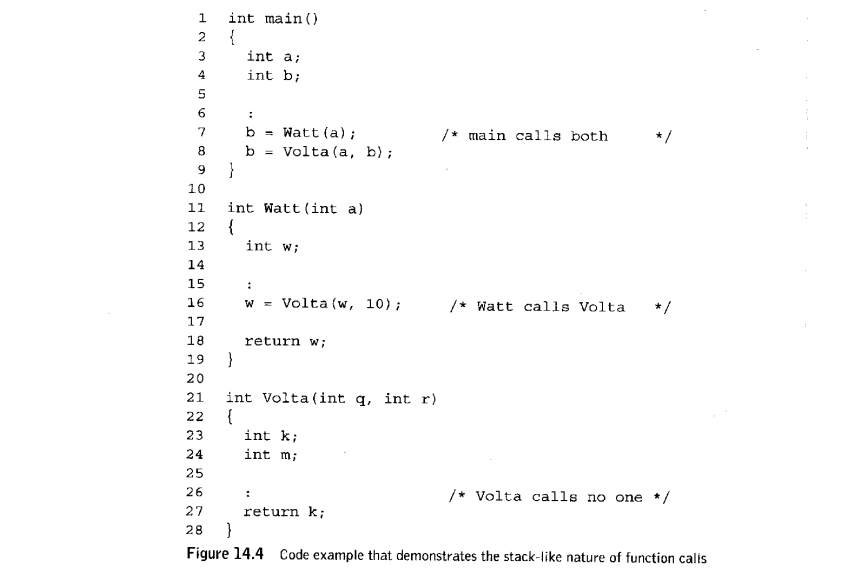

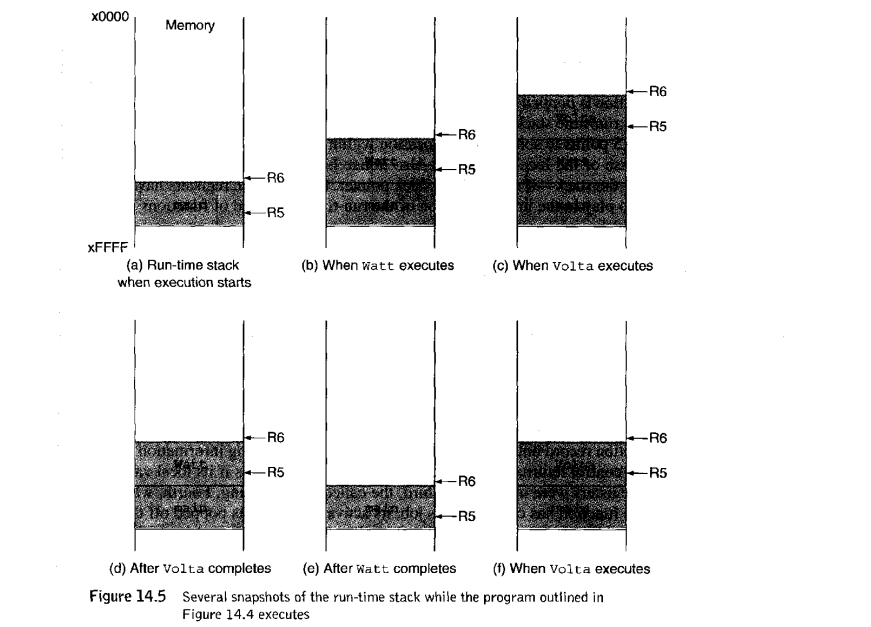

Each of the shaded regions represents the activation record of a particular function call. The sequence of figures shows how the run-time stack grows and shrinks as the various functions are called and return to their caller. Keep in mind that, as we push items onto the stack, the top of the stack moves, or "grows," toward lower-numbered memory locations.

the activation records are allocated in a stack-like fashion 
- whenever a function is called, its activation record is pushed onto the stack.
- Whenever the function returns, its activation is popped off the stack. 

### 14.3.2 Getting It All to Work 
It is clear that there is a lot of work going on at the machine level when a function is called. Parameters must be passed, activation records pushed and popped, control moved from one function to another. Some of this work is accomplished by the caller, some by the callee. 

To accomplish all of this, the following steps are required: 
1. First, code in the caller function copies its arguments into a region of memory accessible by the callee.
2. Second, the code at the beginning of the callee function pushes its activation record onto the stack and saves some bookkeeping information so that when control returns to the caller, it appears to the caller as if its local variables and registers were untouched.
3. Third, the callee does its thing.
4. Fourth, when the callee function has completed its job, its activation record is popped off the runtime stack and control is returned to the caller.
5. Finally, once control is back in the caller, code is executed to retrieve the callee's return value.

#### The Call 

    w = volta (w, 10) ;

the function volta is called with two arguments. The value returned by Volt a is then assigned to the local integer variable w. 

In translating this function call, the compiler generates LC-3 code that does the following:
1. Transmits the value of the two arguments to the function volt a by pushing them directly onto the top of the run-time stack. Recall that R6 points to the top of the run-time stack.

2. Transfers control to Volta via the JSR instruction.

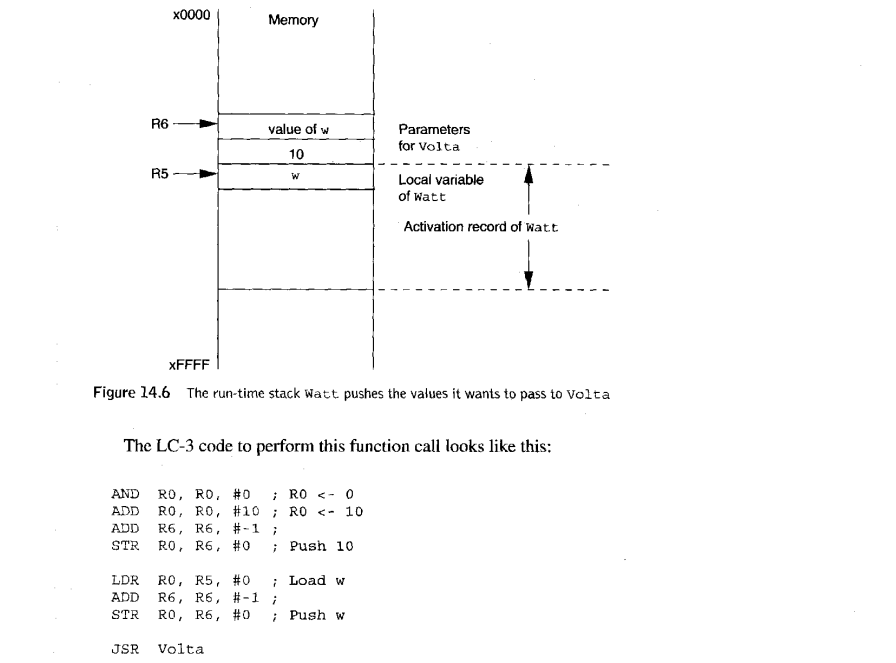

#### Starting the Callee Function
The instruction executed immediately after the JSR in the function Watt is the first instruction in the callee function volta.

Figure 14.7 summarizes the changes to memory accomplished by the code we
have encountered so far. The layout in memory of these two activation recordsone for watt and one for volta—is apparent. Notice that some entries of the
activation record of Volt a are written by watt. In particular, these are the parameter fields of Volta's activation record, watt writes the value of its local variable
w as the first parameter and the value 10 for the second parameter. Keep in mind
that these values are pushed from right to left according to their position in the
function call. Therefore, the value of w appears on top of the value 10.

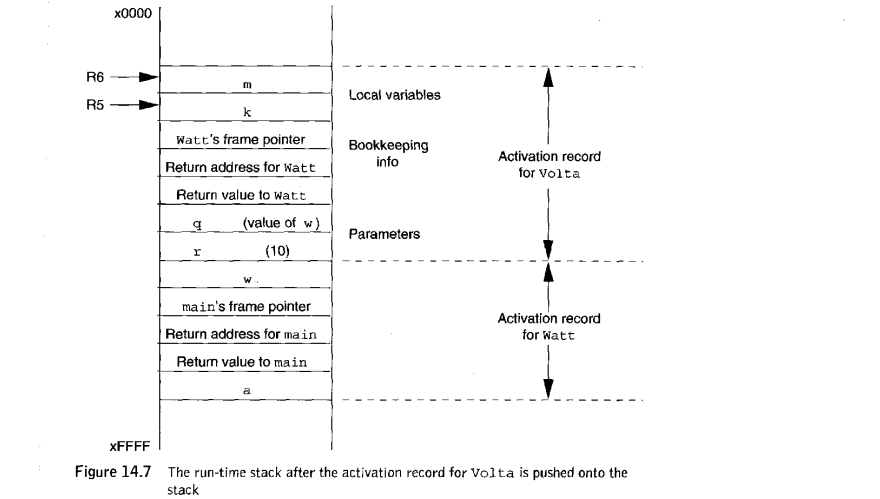

#### Ending the Callee Function
Once the callee function has completed its work, it must perform several tasks prior to returning control to the caller function. Firstly, a function that returns a value needs a mechanism for the return value to be transmitted properly to the caller function. Secondly, the callee must pop the current activation record. 


To enumerate,
1. If there is a return value, it is written into the return value entry of the
activation record.
2. The local variables are popped off the stack.
3. The dynamic link is restored.
4. The return address is restored.
5. The RET instruction returns control to the caller function. 

## 14.4 Problem Solving Using Functions 
### 14.4.2 Problem 2: Pythagorean Triples 
A **Pythagorean Triple** is a set of three integers \(a\), \(b\), and \(c\) that satisfy the equation \(c^2 = a^2 + b^2\), where \(a\) and \(b\) are the lengths of the sides of a right triangle and \(c\) is the hypotenuse, such as the example 3, 4, and 5.

Now, in performing the Triple check, we will need to evaluate the following expression.
    
    (sideC * sideC == (sideA * sideA + sideB * sideB))

    (Squared(sideC) == Squared(sideA) + Squared(sideB)) 

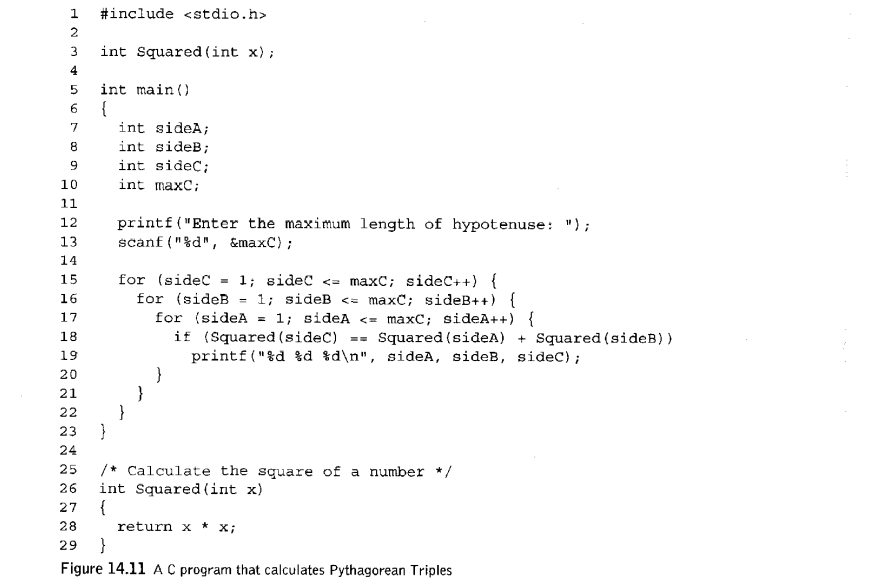

## 14.5 Summary 
Functions are useful because they allow us to create new primitive building blocks that might be useful for a particular programming task (or for a variety of tasks).

In a sense, they allow us to extend the native operations and constructs supported by the language.

Functions enable abstraction: we can write a function to perform a particular task, debug it, test it, and then use it within the program whereever it is needed. 